In [1]:
%matplotlib inline
import matplotlib.pyplot as plt # импорт библиотеки визуализации
import warnings
import numpy as np # библиотека для работы с матрицами
warnings.filterwarnings('ignore') # фильтр красных предупреждений

**Recap**: Модель машинного обучения (predictive model) - параметрическое семейство функций
$$A = \{g(X, \theta) | \theta \in \Theta\}$$
где $g : X \times \Theta \rightarrow Y$ - фиксированная функция,
$\Theta$ - множество допустимых значений параметра $\theta$

**Линейная модель** с вектором параметров $\theta = (\theta_0, ..., \theta_n)$, $\Theta = \mathcal{R}^n$:

$g(x, \Theta) = \Sigma_{j=1}^n\Theta_jf_j(x)$ - для задачи регрессии, $Y=\mathcal{R}$. Пример: $y = ax + b$. Здесь $y=g(x, \Theta)$ - предсказание, $a = \Theta_0$, $b = \Theta_1$, $1 = f_0(x)$ (первый, константный, признак), $x=f_1(x)$ (второй признак)

$g(x, \Theta) = a(\Sigma_{j=1}^n\Theta_jf_j(x))$ - для задачи классификации, $a$ - функция активации

Например, $a(x) = sign(x)$ для $Y = \{-1,1\}$, $a(x) = sigmoid(x) = {{1}\over{1 + e^{-x}}}$ для $Y \in [ \, 0,1 ] \,$

## Зачем линейные модели, когда есть KNN ?
Для ответа на этот вопрос, давайте построим границу классов

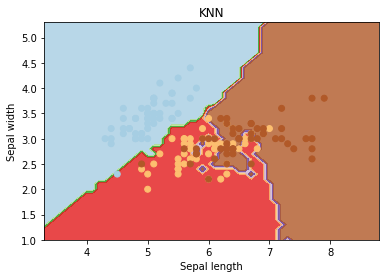

In [2]:
import seaborn as sns
# import seaborn # Можно импортировать так, но тогда вместо вызова методов sns.*, например, sns.load_dataset('iris') придётся использовать длинное название seaborn.load_dataset('iris')
df = sns.load_dataset('iris')
X, y = df.iloc[:, :2], df['species'] # в качестве объектов-признаков берём первые две колонки, которую берём за целевую переменную
values = {specy_name: specy_code for specy_code, specy_name in enumerate(y.unique())} # словарь для кодирования видов цветка в число
# values = {'setosa': 0, 'versicolor': 1, 'virginica': 2} 
y = y.apply(lambda x: values[x])

from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf.fit(X, y)
# создаём сетку для построения графика
h = 0.1 # размер ячейки
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1 # задаём интервалы значений для сетки
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), # делаем сетку значений
 np.arange(y_min, y_max, h))
 
plt.subplot(1, 1, 1)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) # получаем предсказания для этой сетки
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
 
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length') # оси и название укажем на английском
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('KNN')
plt.show()

Слишком сложная граница для такой задачи, не правда ли? Наверняка есть варианты решения попроще 

## Одномерная регрессия
Давайте сгенерируем одномерную регрессию (регрессию для объектов с одним признаком)

**Вопрос!** Сколько у такой модели параметров?

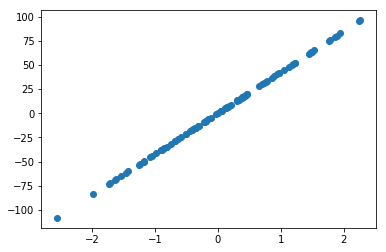

In [3]:
from sklearn.datasets.samples_generator import make_regression # метод для генерации 
X, y = make_regression(n_samples=100, n_features=1, random_state=0) # генерируем 100 объектов с 1 признаком
plt.scatter(X, y)

Обучим простую регрессию

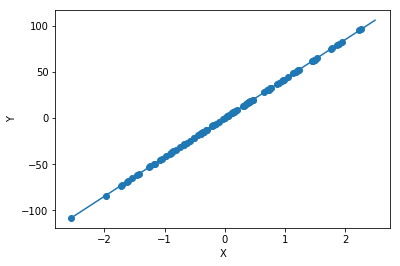

In [4]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression() # инициализация регрессора (пока модель глупая и необученная)
clf.fit(X, y) # говорим модели, какие объекты какой ответ имеют. Модель на них обучается. В итоге модель выучит параметры a и b уравнения y = aX + b
a = clf.coef_[0] # коэффициент при первом (а он у нас 1) признаке
b = clf.intercept_
x_line = np.linspace(-2.5, 2.5) # зададим интервал значений для линии по оси X
y_line = a * x_line + b # подставим найденные коэффициенты a и b в уравнение прямой
plt.scatter(X, y) # нарисуем точки из обучающей выборки
plt.ylabel('Y') # подпишем ось Y
plt.xlabel('X') # подпишем ось X
plt.plot(x_line, y_line) # нарисуем прямую

In [5]:
a, b

(42.385504855817963, 1.7763568394002505e-15)

Давайте теперь посмотрим, как может испортить картину всего 1 аномалия!

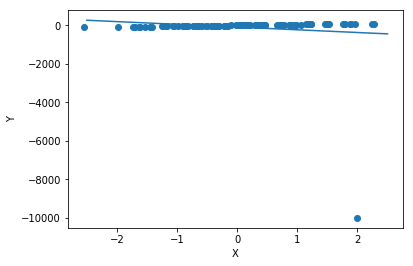

In [6]:
from sklearn.datasets.samples_generator import make_regression # метод для генерации 
X, y = make_regression(n_samples=100, n_features=1, random_state=0) # генерируем 100 объектов с 1 признаком
bad_point_x = 2
bad_point_y = -10000
X = np.concatenate([X, [[bad_point_x]]]) # добавим плохую точку к X
y = np.concatenate([y, [bad_point_y]]) # и к Y
clf = LinearRegression() # инициализация регрессора (пока модель глупая и необученная)
clf.fit(X, y) # говорим модели, какие объекты какой ответ имеют. Модель на них обучается. В итоге модель выучит параметры a и b уравнения y = aX + b
a = clf.coef_[0] # коэффициент при первом (а он у нас 1) признаке
b = clf.intercept_
x_line = np.linspace(-2.5, 2.5) # зададим интервал значений для линии по оси X
y_line = a * x_line + b # подставим найденные коэффициенты a и b в уравнение прямой
plt.scatter(X, y) # нарисуем точки из обучающей выборки
plt.ylabel('Y') # подпишем ось Y
plt.xlabel('X') # подпишем ось X
plt.plot(x_line, y_line) # нарисуем прямую

In [7]:
a, b

(-141.57341423775807, -85.31318200434572)

Кривая стала проходить через данные хуже! Модель оказалась неустойчива к выбросам и аномалиям! "Плохая точка" утянула за собой кривую, и видим, что коэффициенты стали больше. Модель, устойчивая к выбросам, называется "робастной" (robust). Примером такой модели является HuberRegressor 

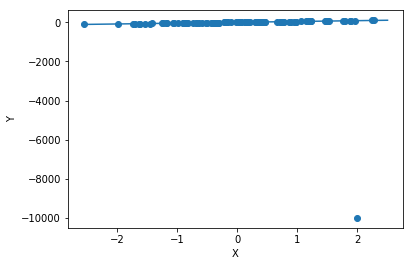

In [8]:
from sklearn.linear_model import HuberRegressor

clf = HuberRegressor() # инициализация регрессора (пока модель глупая и необученная)
clf.fit(X, y) # говорим модели, какие объекты какой ответ имеют. Модель на них обучается. В итоге модель выучит параметры a и b уравнения y = aX + b
a = clf.coef_[0] # коэффициент при первом (а он у нас 1) признаке
b = clf.intercept_
x_line = np.linspace(-2.5, 2.5) # зададим интервал значений для линии по оси X
y_line = a * x_line + b # подставим найденные коэффициенты a и b в уравнение прямой
plt.scatter(X, y) # нарисуем точки из обучающей выборки
plt.ylabel('Y') # подпишем ось Y
plt.xlabel('X') # подпишем ось X
plt.plot(x_line, y_line) # нарисуем прямую

Видим, что HuberRegressor'у пофиг на выброс!

## Многомерная регрессия

In [9]:
from sklearn.model_selection import train_test_split
n_features = 4 # выберите (разумное!) количество признаков > 1
X, y = make_regression(n_samples=100, n_features=n_features, random_state=0)
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
clf = Pipeline([('prescaling', StandardScaler()), # нормируем данные
                ('regressor', LinearRegression())])
clf.fit(X_train, y_train)
from sklearn.metrics import r2_score # Критерий R2
preds_test = clf.predict(X_test)
r2_score(preds_test, y_test)

1.0

Несложно понять, что коэффициенты в регрессии - это важность признаков

In [10]:
regressor = clf.steps[1][1]
regressor.coef_ # коэффициенты

array([ 22.30183975,  34.81741342,  54.42080279,  89.45103966])

## (*) Более крутые методы многомерной регрессии

Однако, обучение многомерной регрессии чревато двумя вещами:
* Признаки могут сильно коррелировать друг с другом. В таком случае решений может быть много (**мультиколлинеарность**). Как бы среди кучи этих решений найти такое, в котором коэффициентов между разными признаками будет максимально поровну? Для этого есть модификация, называемая **RidgeRegression** (L2-регуляризация)
* А что, если некоторые признаки вообще нужно выкинуть? Для этого была придумана **Lasso regression** (L1-регуляризация)
* А что, если хочется и то, и то? **ElasticNet !** (L1 + L2 регуляризация)

В линейной регрессии придумали **штрафовать** за слишком большие коэффициенты. Этот подход называется **регуляризацией**

In [11]:
import pandas as pd
data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data', 
                   names=['sex','length','diameter','height','weight.w','weight.s','weight.v','weight.sh','rings']) # загрузим данные
data.head()

,sex,length,diameter,height,weight.w,weight.s,weight.v,weight.sh,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [12]:
data = pd.get_dummies(data) # закодируем категориальные признаки One-Hot encoding'ом
data.head()

,length,diameter,height,weight.w,weight.s,weight.v,weight.sh,rings,sex_F,sex_I,sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0


In [13]:
X, y = data.drop('rings', 1), data['rings'] # будем предсказывать признак rings на основе остальных

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [15]:
from sklearn.linear_model import ElasticNet, Ridge, Lasso
from sklearn.grid_search import GridSearchCV


# Ridge
clf = Pipeline([('scaler', StandardScaler()),
                ('regressor', Ridge())])
grid_params = {
    'regressor__alpha': [0, 1, 1.5, 2.0], # насколько большая будет регуляризация. Обратите внимание, что к названию параметра добавлися префикс "regressor__" в соответствии с названием пайплайна
}
gs = GridSearchCV(clf, grid_params, cv=5,verbose=0,scoring='r2')
gs.fit(X_train, y_train)
y_pred = gs.best_estimator_.predict(X_test)
print('R2 for best RidgeRegression (train): %.2f' % gs.best_score_)
print('R2 for best RidgeRegression (test): %.2f' % r2_score(y_pred, y_test))

# Lasso
clf = Pipeline([('scaler', StandardScaler()),
                ('regressor', Lasso())])
grid_params = {
    'regressor__alpha': [0, 1, 1.5, 2.0], # насколько большая будет регуляризация
}
gs = GridSearchCV(clf, grid_params, cv=5,verbose=0,scoring='r2')
gs.fit(X_train, y_train)
y_pred = gs.best_estimator_.predict(X_test)
print('R2 for best LassoRegression (train): %.2f' % gs.best_score_)
print('R2 for best LassoRegression (test): %.2f' % r2_score(y_pred, y_test))


# ElasticNet
clf = Pipeline([('scaler', StandardScaler()),
                ('regressor', ElasticNet())])
grid_params = {
    'regressor__alpha': [0, 1, 1.5, 2.0], # насколько большая будет регуляризация
    'regressor__l1_ratio': [0.0, 0.1, 0.5, 0.8, 1.0] # какая доля L1 регуляризации по отношению к общей
}
gs = GridSearchCV(clf, grid_params, cv=5,verbose=0,scoring='r2')
gs.fit(X_train, y_train)
y_pred = gs.best_estimator_.predict(X_test)
print('R2 for best ElasticNet: %.2f (train)' % gs.best_score_)
print('R2 for best ElasticNet (test): %.2f' % r2_score(y_pred, y_test))

c:\users\artem\anaconda3\envs\wos\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
c:\users\artem\anaconda3\envs\wos\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


R2 for best RidgeRegression (train): 0.53
R2 for best RidgeRegression (test): 0.15
R2 for best LassoRegression (train): 0.53
R2 for best LassoRegression (test): 0.15
R2 for best ElasticNet: 0.53 (train)
R2 for best ElasticNet (test): 0.15


Видно, как переобучились модели!

In [16]:
from sklearn.linear_model import ElasticNetCV, RidgeCV, LassoCV

# Ridge
clf = Pipeline([('scaler', StandardScaler()),
                ('regressor', RidgeCV(alphas=[0, 1, 1.5, 2.0], cv=5))])
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('R2 for best RidgeRegression: %.2f' % r2_score(y_pred, y_test))


# Lasso
clf = Pipeline([('scaler', StandardScaler()),
                ('regressor', LassoCV(alphas=[0, 1, 1.5, 2.0], cv=5))])
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('R2 for best LassoRegression: %.2f' % r2_score(y_pred, y_test))


# ElasticNet
clf = Pipeline([('scaler', StandardScaler()),
                ('regressor', ElasticNetCV(alphas=[0, 1, 1.5, 2.0]))])
grid_params = {
    'regressor__l1_ratio': [0.0, 0.1, 0.5, 0.8, 1.0] # какая доля L1 регуляризации по отношению к общей
}
gs = GridSearchCV(clf, grid_params, cv=5,verbose=0,scoring='r2')
gs.fit(X_train, y_train)
y_pred = gs.best_estimator_.predict(X_test)
print('R2 for best ElasticNet: %.2f' % r2_score(y_pred, y_test))

R2 for best RidgeRegression: 0.15
R2 for best LassoRegression: 0.15
R2 for best ElasticNet: 0.15


## Классификация
**Recap:** $g(x, \Theta) = a(\Sigma_{j=1}^n\Theta_jf_j(x))$ - для задачи классификации, $a$ - функция активации

**Сигмоида:** $a(x) = sigmoid(x) = {{1}\over{1 + e^{-x}}}$ для $Y \in [ \, 0,1 ] \,$

Если мы "навесим" сигмоиду на линейную регрессию, получим классификатор. Он называется **логистическая регрессия**
![](http://www.nazim.ru/wp-content/uploads/2016/11/sigmoid.gif)

Обычно, чем ближе предсказания к 1, чем ближе объект ко второму классу, чем ближе к 0, тем ближе к первому. Если предсказание около 0.5, значит классификатор неуверен в своём предсказании

# Логистическая регрессия

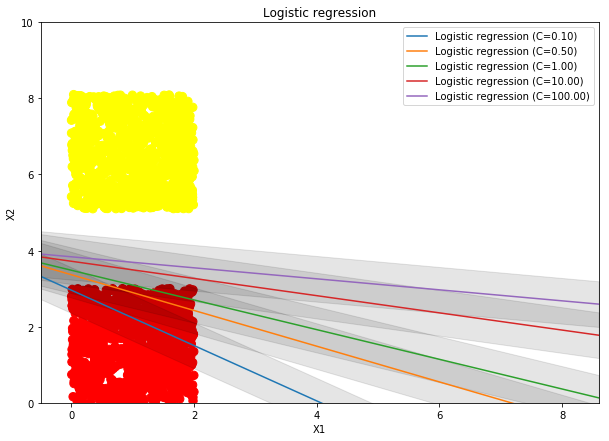

In [17]:
from sklearn.linear_model import LogisticRegression

# Сгенерируем точки двух классов
size = 1000
X1 = np.array([2 * np.random.random(size), 3 * np.random.random(size)]).transpose()
X2 = np.array([2 * np.random.random(size), 5.1 + 3 * np.random.random(size)]).transpose()
X = np.concatenate([X1, X2]) # схлопнем два массива в один
y = np.concatenate([np.zeros(size), np.ones(size)]) # схлопнем два массива меток классов в один

# X, y = make_classification(n_samples=50, n_features=2, n_informative=2, 
#                             n_redundant=0, n_clusters_per_class=1, random_state=0)

x_1 = np.linspace(np.min(X) - 0.5, np.max(X) + 0.5) # задаём интервал значений для X1 (первого признака)


plt.figure(figsize=(10,7))
plt.scatter(X[:, 0], X[:, 1], c=y, s=70, cmap='autumn') # Рисуем точки

for C in [0.1, 0.5, 1.0, 10., 100.]: # параметр логистической регрессии
    w = 0.6
    clf = LogisticRegression(C=C) # здесь можно не использовать Scaler(), потому что мы знаем, что признаки одного порядка
    clf.fit(X, y)
    x_2 = -(clf.intercept_ - clf.coef_.squeeze()[0] * x_1) / clf.coef_.squeeze()[1] # восстановим X2 из выученной кривой
    plt.plot(x_1, x_2, label='Logistic regression (C=%.2f)' % C) # нарисуем кривую решения (разделяющая поверхность)
    plt.fill_between(x_1, x_2 - w, x_2 + w, edgecolor='none', color='k', alpha=0.1)

plt.xlim(x_1[0], x_1[-1]) # диапазон значений по X
plt.ylim(0,10) # диапазон значений по Y
plt.title('Logistic regression') # заголовок
plt.xlabel('X1') # подпись оси X
plt.ylabel('X2') # подпись оси Y
plt.legend()
plt.show()

Коэффициенты (важности) признаков

In [18]:
clf.coef_

array([[-0.75093783,  5.19218856]])

# Метод опорных векторов
**Идея** - а давайте проведём разделяющую линию так, чтобы она максимально далеко проходила от обоих классов
![](http://scikit-learn.org/stable/_images/sphx_glr_plot_separating_hyperplane_0011.png)


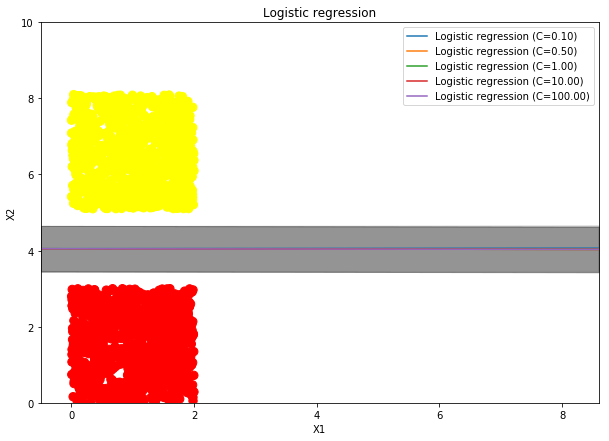

In [19]:
# http://scikit-learn.org/stable/modules/svm.html

from sklearn.svm import SVC # для классификации


size = 1000

x_1 = np.linspace(np.min(X) - 0.5, np.max(X) + 0.5) # задаём интервал значений для X1 (первого признака)


plt.figure(figsize=(10,7))
plt.scatter(X[:, 0], X[:, 1], c=y, s=70, cmap='autumn') # Рисуем точки

for C in [0.1, 0.5, 1.0, 10., 100.]: # параметр логистической регрессии
    w = 0.6
    clf = SVC(C=C, kernel='linear')
    clf.fit(X, y)
    x_2 = -(clf.intercept_ - clf.coef_.squeeze()[0] * x_1) / clf.coef_.squeeze()[1] # восстановим X2 из выученной кривой
    plt.plot(x_1, x_2, label='Logistic regression (C=%.2f)' % C) # нарисуем кривую решения (разделяющая поверхность)
    plt.fill_between(x_1, x_2 - w, x_2 + w, edgecolor='none', color='k', alpha=0.1)

plt.xlim(x_1[0], x_1[-1]) # диапазон значений по X
plt.ylim(0,10) # диапазон значений по Y
plt.title('Logistic regression') # заголовок
plt.xlabel('X1') # подпись оси X
plt.ylabel('X2') # подпись оси Y
plt.legend()
plt.show()

**Задание:** с помощью кросс-валидации подберите наилучшие параметры и получите наилучшее качество для [данных](https://raw.githubusercontent.com/gastonstat/CreditScoring/master/CreditScoring.csv) кредитного скоринга для моделей логистической регрессии и метода опорных векторов. Определите с помощью коэффициентов логистической регрессии и SVM, какие признаки наиболее значимые

In [20]:
data = pd.read_csv('https://raw.githubusercontent.com/gastonstat/CreditScoring/master/CreditScoring.csv')
# TODO